In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
dataset_dir = "E:\OralDisease\data\TRAIN"
categories = ["Caries","Gingivitis"]

#Resize dimensions
IMG_HEIGHT , IMG_WIDTH = 128 , 128

def load_data(dataset_dir,categories):
    data =[]
    labels=[]

    for i ,category in enumerate(categories):
        path = os.path.join(dataset_dir,category)
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            try:
              image = cv2.imread(img_path)
              image = cv2.resize(image,(IMG_HEIGHT,IMG_WIDTH))
              data.append(image)
              labels.append(i)

            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    return np.array(data) , np.array(labels)

data,labels = load_data(dataset_dir,categories)

In [4]:
#normalization
data = data/255.0

In [5]:
x_train, x_test , y_train , y_test = train_test_split(data,labels,test_size=0.2,random_state=42)
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test , num_classes=2)

In [6]:
datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,horizontal_flip=True)


In [7]:
datagen.fit(x_train)

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: caries and gingivitis
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


e:\OralDisease\oenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=32),validation_data=(x_test,y_test),epochs=20)


e:\OralDisease\oenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 472ms/step - accuracy: 0.5950 - loss: 0.7063 - val_accuracy: 0.7852 - val_loss: 0.4514
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 570ms/step - accuracy: 0.7606 - loss: 0.4911 - val_accuracy: 0.9195 - val_loss: 0.3145
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 461ms/step - accuracy: 0.8422 - loss: 0.3773 - val_accuracy: 0.9463 - val_loss: 0.2075
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 501ms/step - accuracy: 0.8463 - loss: 0.3476 - val_accuracy: 0.8658 - val_loss: 0.3218
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 486ms/step - accuracy: 0.8563 - loss: 0.3333 - val_accuracy: 0.9463 - val_loss: 0.1782
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 515ms/step - accuracy: 0.8402 - loss: 0.3410 - val_accuracy: 0.9597 - val_loss: 0.1811
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 511ms/step - accuracy: 0.8716 - loss: 0.3004 - val_accuracy: 0.9027 - val_loss: 0.2604
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 484ms/step - accuracy: 0.8677 - loss: 0.3249 - val_accu

In [13]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9550 - loss: 0.1543
Test Accuracy: 94.63%


In [30]:
import matplotlib.pyplot as plt

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
              precision    recall  f1-score   support

      Caries       0.99      0.83      0.90       151
  Gingivitis       0.85      0.99      0.92       147

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298

Confusion Matrix:
 [[125  26]
 [  1 146]]


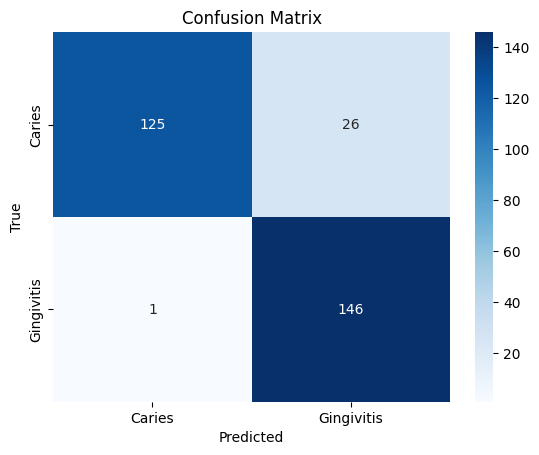

Confusion matrix plot saved as confusion_matrix.png


<Figure size 640x480 with 0 Axes>

In [31]:

# Generate Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=categories))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
plt.savefig("confusion_matrix.png")
print("Confusion matrix plot saved as confusion_matrix.png")

In [19]:
model.save("oral_disease_model.h5")


In [20]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("oral_disease_model.h5")


In [21]:
import os
import cv2
import numpy as np

# Define image dimensions
IMG_HEIGHT, IMG_WIDTH = 128, 128

def load_test_data(dataset_dir):
    data = []
    filenames = []
    for category in os.listdir(dataset_dir):
        category_path = os.path.join(dataset_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Load and resize image
                image = cv2.imread(img_path)
                image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH))
                data.append(image)
                filenames.append(img_name)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(data), filenames

# Load the test dataset (folder containing images of Caries and Gingivitis)
test_dir = "data/TEST"
test_data, test_filenames = load_test_data(test_dir)

# Normalize the images (scale pixel values to [0, 1])
test_data = test_data / 255.0


In [22]:
# Predict the classes for the test images
predictions = model.predict(test_data)

# Convert predictions to class labels (0 for Caries, 1 for Gingivitis)
predicted_labels = np.argmax(predictions, axis=1)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step


In [23]:
# Display predictions for each image
for filename, label in zip(test_filenames, predicted_labels):
    if label == 0:
        predicted_class = "Caries"
    else:
        predicted_class = "Gingivitis"
    print(f"Image: {filename}, Predicted Class: {predicted_class}")


Image: 196_2.jpg, Predicted Class: Gingivitis
Image: 197_1.jpg, Predicted Class: Caries
Image: 198_2.jpg, Predicted Class: Caries
Image: 199_2.jpg, Predicted Class: Caries
Image: 200_2.jpg, Predicted Class: Gingivitis
Image: 201_2.jpg, Predicted Class: Caries
Image: 202_2.jpg, Predicted Class: Caries
Image: 203_2.jpg, Predicted Class: Caries
Image: 204_2.jpg, Predicted Class: Caries
Image: 205_2.jpg, Predicted Class: Caries
Image: 206_2.jpg, Predicted Class: Gingivitis
Image: 206_6.jpg, Predicted Class: Gingivitis
Image: 207_2.jpg, Predicted Class: Caries
Image: 208_2.jpg, Predicted Class: Caries
Image: 209_2.jpg, Predicted Class: Caries
Image: 210_2.jpg, Predicted Class: Caries
Image: 210_6.jpg, Predicted Class: Caries
Image: 211_2.jpg, Predicted Class: Caries
Image: 211_6.jpg, Predicted Class: Caries
Image: 212_2.jpg, Predicted Class: Caries
Image: 213_2.jpg, Predicted Class: Caries
Image: 214_2.jpg, Predicted Class: Caries
Image: 215_2.jpg, Predicted Class: Caries
Image: 216_2.jpg, 

In [28]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("E:\OralDisease\oral_disease_model.h5")
img_path = r"E:\OralDisease\data\TEST\Gingivitis\680_1.jpg"

# Test a single image
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    print(f"Predicted class: {categories[class_idx]}")

predict_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Predicted class: Gingivitis
